In [1]:
from tqdm import tqdm

# Band Structure

Let's first analyze $H'_Q(z)$, where $V_{ext}(z) = s E_R \sin^2(qz/2) = \frac{sE_R}{2}\left(1 - \cos(qz)\right) $, where $q=2\pi/d$.
Then, we have
\begin{equation}
    \left( \frac{\hbar^2}{2m}\left(k_x^2 + k_y^2 + (-i\partial_z + Q + k_z)^2 \right) + V_{ext}(z)- \mu)\right) u(z) = \epsilon u(z) 
\end{equation}
Define $\bar \epsilon = \epsilon - \left( \frac{\hbar^2}{2m}(k_x^2 + k_y^2) + E_R/2 -\mu  \right)$ and $u(z) = \sum_n u_n \mathrm{e}^{iqnz} $.

The equation above turns into
\begin{equation}
      \frac{\hbar^2}{2m} \left( qn + Q + k_z \right)^2 u_n  - \frac{E_R}{2} (u_{n-1} + u_{n+1}) = \bar \epsilon u_{n}
\end{equation}

Introducing $\xi_{n,Q} = \frac{\hbar^2}{2m} \left( qn + Q + k_z \right)^2 $ and using the Fourier coefficients of the external potential
\begin{equation}
  V_{ext}(z) = s E_R \sin^2(qz/2) = \frac{sE_R}{2}\left(1 - \cos(qz)\right) = \sum_n V_n  \mathrm{e}^{iqnz}, \quad \mathrm{s.t.} \quad V_{\pm 1}=v=sE_R/4, V_0=2v.
\end{equation}
and the equation above can be given in matrix form as
\begin{equation}
    \begin{pmatrix} \ddots &                 &           &                &     &   & & \\
                    \ddots & \ddots          &   \ddots       &                 &       & & &  \\
                           &\textit{-}v      & \xi_{1,Q}+2v     & \textit{-}v    &    &  & &\\
                           &          &     \textit{-}v      &\xi_{0,Q}+2v     & \textit{-}v    & & &  \\
                           &          &           & \textit{-}v    &\xi_{{\textit{-}1},Q}+2v    & \textit{-}v & &\\
                           & & & &\ddots &\ddots &\ddots &  \\
                           & & & & & &\ddots &
                                                \end{pmatrix}  
                    \begin{pmatrix} \vdots \\ \vdots \\ u_1 \\ u_0 \\ u_{\textit{-}1} \\ \vdots \\ \vdots \end{pmatrix}
                    =
                   \bar\epsilon \begin{pmatrix} \vdots \\ \vdots \\ u_1 \\ u_0 \\ u_{\textit{-}1} \\ \vdots \\ \vdots \end{pmatrix} 
\end{equation}

Length scale $d$, 

Energy scale $\hbar^2/(2md^2)$ 

In [102]:
# file: pynstar/bands.py

import numpy as np
import scipy.sparse as sp

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt

In [104]:
# file: pynstar/bands.py

# kz in [-pi,pi]
def ξkQ(kz,Q,n):
    return (2*np.pi*n+Q+kz)**2

In [236]:
# half of wavevector of the periodic lattice wave vector
qB = np.pi

# strength of the sin^2(qB*z) periodic potential
s = 1
sER = s*qB**2

In [237]:
# number of bands is 2*nmax+1
nmax = 1
dB = 2*nmax+1
nn = np.arange(-nmax,nmax+1)

kcut = (nmax+1)*np.pi
Ecut = kcut**2

In [238]:
Q = 0
kz = 0*np.pi
kr = 0
μ  = 0*sER

FCoeffs = np.zeros(3)
FCoeffs[0] = -sER/4
FCoeffs[1] = sER/2
FCoeffs[2] = -sER/4
print(FCoeffs)

[-2.4674011  4.9348022 -2.4674011]


In [239]:
# file: pynstar/bands.py

def FMat(FCoeffs, nmax):
    FCoeffs0 = FCoeffs
    dB = 2*nmax+1
    MM = np.zeros([dB,dB])
    dM = len(FCoeffs)//2+1
    for iFc,Fc in enumerate(FCoeffs0):
        MM+=np.diag([Fc]*(dB-np.abs(-dM+iFc+1)),-dM+iFc+1)
    return MM # +MM.T

def Hband(nmax,Q,kz,kr,FCoeffs,μ):
    nn = np.arange(-nmax,nmax+1)
    HH = np.diag(ξkQ(kz,Q,nn)+kr**2-μ)
    HH+= FMat(FCoeffs, nmax)
    return HH

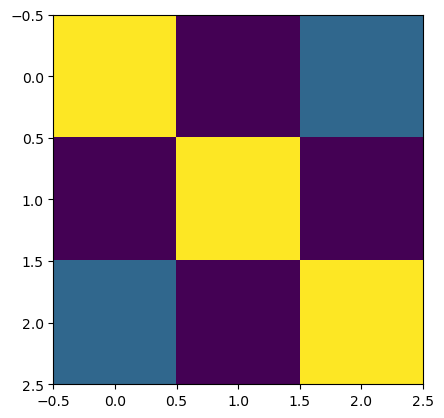

In [240]:
plt.imshow(FMat(FCoeffs, nmax))

In [241]:
Hb = Hband(nmax,Q,kz,kr,FCoeffs,μ)

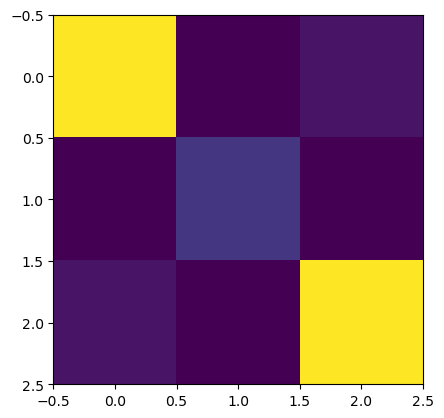

In [242]:
plt.imshow(Hb)

In [243]:
# number of points in the Brillouin zone
Nkz = 8

kkz, dkz = np.linspace(-Nkz//2,+Nkz//2,Nkz,endpoint=False, retstep=True)
kkz *= 2*np.pi/Nkz
dkz *= 2*np.pi/Nkz
dkz

np.float64(0.7853981633974483)

In [244]:
Ebands=[]
Ubands=[]
for kz in kkz:
    Hb = Hband(nmax,Q,kz,kr,FCoeffs,μ)
    ee, uu = np.linalg.eigh(Hb)
    Ebands.append(ee)
    Ubands.append(uu)
Ebands=np.array(Ebands)
Ubands = np.array(Ubands)

In [245]:
ao = (np.sqrt(5)+1)/2

In [246]:
import tol_colors

In [247]:
schemes = tol_colors.tol_cset()

In [248]:
cset = tol_colors.tol_cset('bright')

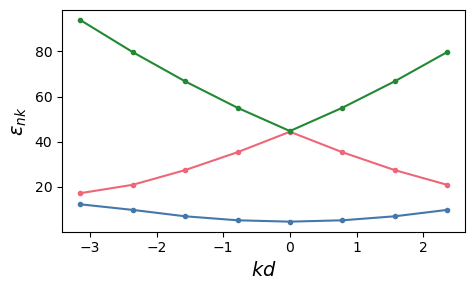

In [249]:
fig, ax = plt.subplots(1,1,figsize=(3*ao,3))

# plot the first nbands bands
nbands=3
for ni,n in enumerate(nn[:nbands]):
    ax.plot(kkz,Ebands[:,ni],'.-',c=cset[ni]);

ax.set_xlabel(r'$kd$', fontsize=14)
ax.set_ylabel(r'$\varepsilon_{nk}$', fontsize=14)

fig.tight_layout()
fig.savefig('figs/band_structure.pdf')

In [250]:
2*np.sort(Ebands[:,0])[:5]

array([ 9.25749941, 10.45142796, 10.45142796, 13.99571617, 13.99571617])

In [251]:
np.sort(Ebands[:,1])[:5]

array([17.23235202, 20.93310161, 20.93310161, 27.44286047, 27.44286047])

In [252]:
# band gaps
for i in range(dB-1):
    print(min(Ebands[:,i+1])-max(Ebands[:,i]))

4.9329970437837645
0.30605249607479834


In [253]:
# band widths
for i in range(dB):
    print(max(Ebands[:,i])-min(Ebands[:,i]))

7.670605269775883
27.180867786872582
49.119075720364776


# Orthonormality of Bloch functions in real space

In [254]:
from scipy.special import roots_legendre
xGL, wGL = roots_legendre(256)
xGL = xGL/2 # -0.5 < x < 0.5
wGL = wGL/2

wGL.dot(xGL**2)-2*(0.5)**3/3

np.float64(2.9282132274488504e-15)

In [255]:
Ubands[0,:,0].dot(Ubands[0,:,1])

np.float64(-2.220446049250313e-16)

In [256]:
# orthonormality in k-space
in1=0
ik1=1
in2=1
ik2=ik1
Cnk1 = Ubands[ik1,:,in1]
Cnk2 = Ubands[ik2,:,in2]
np.linalg.norm(Cnk1), np.linalg.norm(Cnk2), np.conj(Cnk1).dot(Cnk2)

(np.float64(1.0000000000000002),
 np.float64(1.0),
 np.float64(2.7755575615628914e-17))

$$ \psi_{n,k}(x) = u_{n,k}(x) \mathrm{e}^{ikx} = \sum_n C_{n,k}  \mathrm{e}^{iG_nx}  \mathrm{e}^{ikx} $$

Gauss quadrature

$$ \int \mathrm{d}x f(x) = \sum_i w_i f(x_i) $$

In [257]:
Gnn = 2*np.pi*nn
nn

array([-1,  0,  1])

In [258]:
expiGnx = np.exp(1j*np.outer(Gnn,xGL))
expiGnx.shape

(3, 256)

In [259]:
wGL.dot(np.abs(expiGnx[2,:])**2)

np.float64(0.9999999999999998)

In [260]:
unk1 = Cnk1.dot(expiGnx)

In [261]:
def f_unk(x,Cnk,Gnn):
    expiGnx = np.exp(1j*np.outer(Gnn,x))
    return Cnk.dot(expiGnx)

In [262]:
def f_Psink(x,Cnk,Gnn,k):
    expiGnx = np.exp(1j*np.outer(Gnn,x))
    return Cnk.dot(expiGnx)*np.exp(1j*k*x)

In [263]:
unk1 = f_unk(xGL,Cnk1,Gnn)

In [264]:
unk2 = f_unk(xGL,Cnk2,Gnn)

In [265]:
def f_u2nk(x,Cnk,Gnn,Cnk2=None):
    if Cnk2 is None:
        return np.abs(f_unk(x,Cnk,Gnn))**2
    else:
        return np.real( np.conj(f_unk(x,Cnk,Gnn))*f_unk(x,Cnk2,Gnn) )

In [266]:
def f_Psi2nk(x,Cnk,k,Gnn,Cnk2=None,k2=0):
    if Cnk2 is None:
        return np.abs(f_unk(x,Cnk,Gnn))**2
    else:
        return np.real( np.conj(f_unk(x,Cnk,Gnn)*np.exp(1j*k*x))*f_unk(x,Cnk2,Gnn)*np.exp(1j*k2*x) )

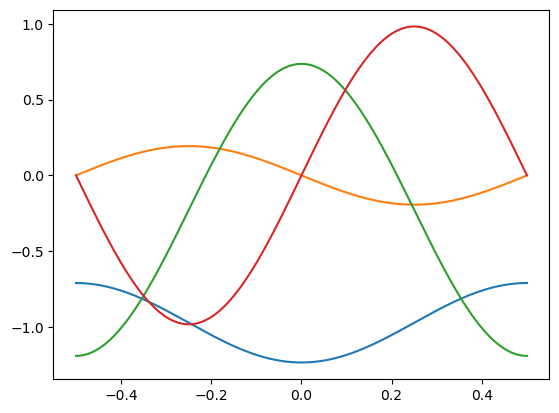

In [267]:
plt.plot(xGL, np.real(unk1))
plt.plot(xGL, np.imag(unk1))
plt.plot(xGL, np.real(unk2))
plt.plot(xGL, np.imag(unk2))

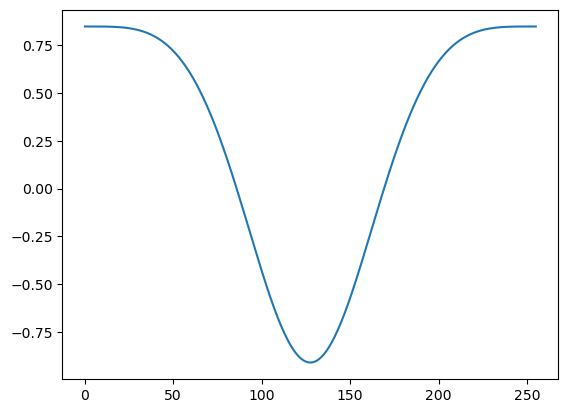

In [268]:
plt.plot( np.real( np.conj(f_unk(xGL,Cnk1,Gnn)*np.exp(1j*kkz[ik1]*xGL))*f_unk(xGL,Cnk2,Gnn)*np.exp(1j*kkz[ik2]*xGL) ) )

In [269]:
wGL.dot(np.abs(unk1)**2), wGL.dot(np.abs(unk2)**2)

(np.float64(0.999999999999992), np.float64(1.000000000000007))

In [270]:
from scipy import integrate

In [271]:
integrate.simpson(np.abs(unk1)**2, x=xGL)

np.float64(0.9999777960917217)

In [272]:
integrate.trapezoid(np.abs(unk1)**2, x=xGL)

np.float64(0.9999654263982534)

In [273]:
integrate.quad(f_u2nk,-0.5,0.5,args=(Cnk1,Gnn)),
integrate.quad(f_u2nk,-0.5,0.5,args=(Cnk2,Gnn))

(1.0, 2.835699462365648e-12)

In [274]:
wGL.dot( f_u2nk(xGL,Cnk1,Gnn,Cnk2) )

np.float64(1.3925546913512443e-14)

In [275]:
integrate.quad(f_u2nk,-0.5,0.5,args=(Cnk1,Gnn,Cnk2))

(-1.3877787807814457e-17, 4.362618200655808e-12)

In [276]:
wGL.dot( f_Psi2nk(xGL,Cnk1,kkz[ik1],Gnn,Cnk2,kkz[ik2]) )

np.float64(1.3911885966139126e-14)

In [277]:
integrate.quad(f_Psi2nk,-0.5,0.5,args=(Cnk1,kkz[ik1],Gnn,Cnk2,kkz[ik2]))

(-1.3877787807814457e-17, 4.362616553024716e-12)

# Two particle problem in CoM and relative coordinates

In [278]:
# k-space points 
NG = Nkz       # number of points in one G interval / 2 
NKCM  = 2*NG

KCMBZ = 2*np.pi*np.linspace(-NKCM//2,+NKCM//2,NKCM,endpoint=False)/NKCM
krelBZ = 2*np.pi*np.linspace(-NG//2,NG//2,2*NG,endpoint=False)/NG
dkBz = np.diff(krelBZ)[0]

#krelBZ, dkBZ = np.linspace(-np.pi,np.pi,2*NG,endpoint=False,retstep=True)
#KCMBZ = np.linspace(-NKCM*dkBZ,+NKCM*dkBZ,2*NKCM+1,endpoint=True)

Nkrel = len(krelBZ)

In [279]:
#KCMBZ = np.sort( np.array( [KCMBZ-dkBz, KCMBZ, KCMBZ+dkBz] ).flatten() )

In [280]:
KCMBZ, krelBZ

(array([-3.14159265, -2.74889357, -2.35619449, -1.96349541, -1.57079633,
        -1.17809725, -0.78539816, -0.39269908,  0.        ,  0.39269908,
         0.78539816,  1.17809725,  1.57079633,  1.96349541,  2.35619449,
         2.74889357]),
 array([-3.14159265, -2.74889357, -2.35619449, -1.96349541, -1.57079633,
        -1.17809725, -0.78539816, -0.39269908,  0.        ,  0.39269908,
         0.78539816,  1.17809725,  1.57079633,  1.96349541,  2.35619449,
         2.74889357]))

In [281]:
# number of repeated zones and state ordering 
NCM = 2
Nrel = 2
dCM = 2*NCM+1
drel = 2*Nrel+1

dimH2 = dCM*drel*Nkrel
print('dim H2 = ', dimH2)

import itertools

KCM0 = KCMBZ[NKCM//2]
KKCM = []
for nCM in range(-NCM,+NCM+1):
#    for KCM0 in KCMBZ[NKCM//2-1:NKCM//2+2]:
        KKCM.append(KCM0+nCM*2*np.pi)
KKCM = np.array(KKCM).flatten()

kkrel = []
for nrel in range(-Nrel,+Nrel+1):
    kkrel.append(krelBZ+nrel*2*np.pi)
kkrel = np.array(kkrel).flatten()

dim H2 =  400


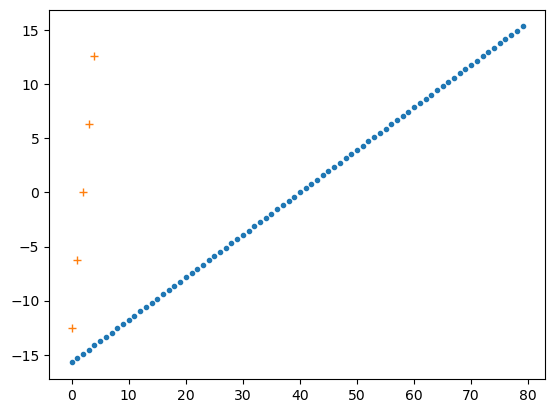

In [282]:
plt.plot(kkrel,'.')
plt.plot(KKCM,'+')

In [283]:
k2 = np.array( list( itertools.product(KKCM,kkrel) ))
KCM0, len(k2)

(np.float64(0.0), 400)

In [284]:
k2[::Nkrel*drel+Nkz]/(np.pi)

array([[-4., -5.],
       [-2., -4.],
       [ 0., -3.],
       [ 2., -2.],
       [ 4., -1.]])

In [285]:
import scipy as sp

In [286]:
# non-interacting part : kinetic + lattice
H2 = sp.sparse.diags( [ KCM**2/2+2*krel**2+sER for KCM,krel in k2 ] )
ind_shift = Nkrel*drel
iCM = 1
H2 += sp.sparse.diags( [sER/4]*(dimH2-ind_shift*iCM-Nkz*iCM) , ind_shift*iCM+Nkz*iCM )
H2 += sp.sparse.diags( [sER/4]*(dimH2-ind_shift*iCM+Nkz*iCM) , ind_shift*iCM-Nkz*iCM )
H2 += sp.sparse.diags( [sER/4]*(dimH2-ind_shift*iCM-Nkz*iCM) , -(ind_shift*iCM+Nkz*iCM) )
H2 += sp.sparse.diags( [sER/4]*(dimH2-ind_shift*iCM+Nkz*iCM) , -(ind_shift*iCM-Nkz*iCM) )

# interaction 
g = 0.01
Hint_rel = -g*np.ones([drel*Nkrel,drel*Nkrel])

H2 += sp.linalg.block_diag(*list(itertools.repeat(Hint_rel,dCM) ))

In [287]:
H2.diagonal();

In [288]:
plt.plot( np.sort( H2.diagonal() ).T ,'.')
plt.plot( np.sort( (k2[:,0]/2+k2[:,1])**2 + (k2[:,0]/2-k2[:,1])**2 ) , '+' )

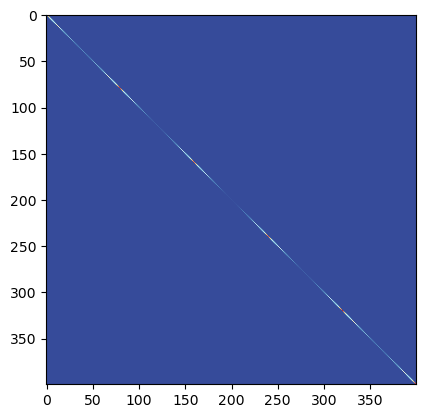

In [289]:
plt.imshow(H2,cmap=tol_colors.tol_cmap('sunset'))

array([ 9.24534502,  9.53491814,  9.55581181, 10.42993788, 10.45067122,
       11.91423306, 11.93505277, 13.97305752, 13.99410222, 16.57144002,
       16.59296276, 19.61343211, 19.63609618, 22.75424934, 22.78018385,
       24.50926752, 29.44353283, 29.45455092, 29.74220967, 29.7521211 ,
       29.76246725, 29.76256959, 30.66583608, 30.66979104, 30.68595108,
       30.68599526, 32.20479685, 32.20690469, 32.22490841, 32.22493372])

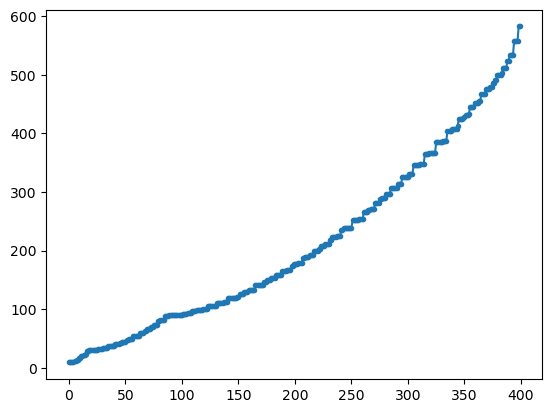

In [290]:
E2, U2 = np.linalg.eigh(H2)
plt.plot(E2,'.-')
E2[:30]

In [291]:
E2s, U2s = sp.sparse.linalg.eigs(H2,k=20,which='SR')
E2s

array([ 9.24534502+0.j,  9.53491814+0.j,  9.55581181+0.j, 10.42993788+0.j,
       10.45067122+0.j, 11.91423306+0.j, 11.93505277+0.j, 13.99410222+0.j,
       13.97305752+0.j, 16.57144002+0.j, 16.59296276+0.j, 19.61343211+0.j,
       19.63609618+0.j, 22.78018385+0.j, 22.75424934+0.j, 24.50926752+0.j,
       29.45455092+0.j, 29.44353283+0.j, 29.74220967+0.j, 29.7521211 +0.j])

In [292]:
2*np.sort(Ebands[:,:])

array([[ 24.59870995,  34.46470404, 187.67669604],
       [ 19.64254431,  41.86620322, 159.32365094],
       [ 13.99571617,  54.88572094, 133.44545311],
       [ 10.45142796,  70.72515148, 110.04700584],
       [  9.25749941,  88.82643961,  89.4385446 ],
       [ 10.45142796,  70.72515148, 110.04700584],
       [ 13.99571617,  54.88572094, 133.44545311],
       [ 19.64254431,  41.86620322, 159.32365094]])

In [293]:
np.sort(Ebands[:,:])[0,0]+np.sort(Ebands[:,:])[1,0]

np.float64(22.120627130997054)

### Alternatively

Construct KCM and krel from the single particle k-mesh directly

In [294]:
kk1 = []
for n in nn:
    kk1.append(kkz+n*2*np.pi)
kk1 = np.array(kk1).flatten()

In [295]:
k1xk1 = np.array( list( itertools.product(kk1,kk1) ))

In [296]:
kk2 = np.array( [ np.sum(k1xk1,axis=1), np.diff(k1xk1,axis=1).flatten()/2 ]).T

In [297]:
kk2

array([[-18.84955592,   0.        ],
       [-18.06415776,   0.39269908],
       [-17.27875959,   0.78539816],
       ...,
       [ 15.70796327,  -0.78539816],
       [ 16.49336143,  -0.39269908],
       [ 17.27875959,   0.        ]])

# Two particle problem in Bloch basis

Basis 
$$ \vert n_1,k_1 \rangle \otimes \vert n_2,k_2 \rangle $$

In [298]:
Bloch_states = np.array( list( itertools.product(np.arange(dB),np.arange(Nkz)) ) )

Bloch_2states = np.array( list( itertools.product( Bloch_states, Bloch_states ) ) )
len(Bloch_states), len(Bloch_2states)

(24, 576)

In [299]:
Bloch_states[-3], Bloch_2states[10]

(array([2, 5]),
 array([[0, 0],
        [1, 2]]))

In [300]:
kkz[2]/np.pi

np.float64(-0.5)

In [301]:
# state index from quantum numbers
ni = 2
ik = 4

ind = ni*Nkz+ik 
ind, Bloch_states[ind], ni, ik

(20, array([2, 4]), 2, 4)

In [302]:
Bloch_2states[0]

array([[0, 0],
       [0, 0]])

In [303]:
ni1 = 0
ik1 = 1
ni2 = 2
ik2 = 2

ind1 = ni1*Nkz+ik1 
ind2 = ni2*Nkz+ik2

ind_2 = ind1*len(Bloch_states)+ind2

Bloch_2states[ind_2]
ind_2, Bloch_2states[ind_2], np.array( [[ni1,ik1],[ni2,ik2]] )

(42,
 array([[0, 1],
        [2, 2]]),
 array([[0, 1],
        [2, 2]]))

### non-zero matrix elements

In [304]:
k4 = np.array( list( itertools.product(kkz,kkz,-kkz,-kkz) ))

In [305]:
len( k4[np.sum(k4,axis=1)==0] ) / len(k4)

0.083984375

In [306]:
np.sum( k4/np.pi, axis=1 )[:20]

array([ 0.  , -0.25, -0.5 , -0.75, -1.  , -1.25, -1.5 , -1.75, -0.25,
       -0.5 , -0.75, -1.  , -1.25, -1.5 , -1.75, -2.  , -0.5 , -0.75,
       -1.  , -1.25])

In [307]:
k4sum_values = np.arange(-4,4+1,2)
k4sum_values

array([-4, -2,  0,  2,  4])

In [335]:
# toplami 9 olan iki sayi
liste = np.arange(0,10)
liste

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [343]:
liste2 = list( itertools.product(liste,liste))
liste2 = np.array(liste2)

In [344]:
liste2 [ np.sum( np.array( liste2 ), axis=1) == 9 ]

array([[0, 9],
       [1, 8],
       [2, 7],
       [3, 6],
       [4, 5],
       [5, 4],
       [6, 3],
       [7, 2],
       [8, 1],
       [9, 0]])

In [345]:
for n1 in liste:
    print( n1, 9-n1)

0 9
1 8
2 7
3 6
4 5
5 4
6 3
7 2
8 1
9 0


In [308]:
k4_list = []
for k4sum in k4sum_values:
    #for ind in np.where( np.mod(np.sum(k4,axis=1),2*np.pi)==0 )[0]:
    k4_sublist=[]
    for ind in np.where( np.sum(k4,axis=1)/np.pi==k4sum )[0]:
        k4_sublist.append( [k4sum, ind, *np.unravel_index(ind, [Nkz,Nkz,Nkz,Nkz]) ])
        print( ind, np.sum(k4,axis=1)[ind]/np.pi , np.unravel_index(ind, [Nkz,Nkz,Nkz,Nkz]) )
    k4_list.append(np.array(k4_sublist))

15 -2.0 (np.int64(0), np.int64(0), np.int64(1), np.int64(7))
22 -2.0 (np.int64(0), np.int64(0), np.int64(2), np.int64(6))
29 -2.0 (np.int64(0), np.int64(0), np.int64(3), np.int64(5))
36 -2.0 (np.int64(0), np.int64(0), np.int64(4), np.int64(4))
43 -2.0 (np.int64(0), np.int64(0), np.int64(5), np.int64(3))
50 -2.0 (np.int64(0), np.int64(0), np.int64(6), np.int64(2))
87 -2.0 (np.int64(0), np.int64(1), np.int64(2), np.int64(7))
94 -2.0 (np.int64(0), np.int64(1), np.int64(3), np.int64(6))
101 -2.0 (np.int64(0), np.int64(1), np.int64(4), np.int64(5))
108 -2.0 (np.int64(0), np.int64(1), np.int64(5), np.int64(4))
115 -2.0 (np.int64(0), np.int64(1), np.int64(6), np.int64(3))
122 -2.0 (np.int64(0), np.int64(1), np.int64(7), np.int64(2))
159 -2.0 (np.int64(0), np.int64(2), np.int64(3), np.int64(7))
166 -2.0 (np.int64(0), np.int64(2), np.int64(4), np.int64(6))
173 -2.0 (np.int64(0), np.int64(2), np.int64(5), np.int64(5))
180 -2.0 (np.int64(0), np.int64(2), np.int64(6), np.int64(4))
187 -2.0 (np.int

In [309]:
sum( [len(k4) for k4 in k4_list] )/Nkz**4

0.124755859375

In [310]:
k4_list[1]

array([[  -2,   15,    0,    0,    1,    7],
       [  -2,   22,    0,    0,    2,    6],
       [  -2,   29,    0,    0,    3,    5],
       [  -2,   36,    0,    0,    4,    4],
       [  -2,   43,    0,    0,    5,    3],
       [  -2,   50,    0,    0,    6,    2],
       [  -2,   87,    0,    1,    2,    7],
       [  -2,   94,    0,    1,    3,    6],
       [  -2,  101,    0,    1,    4,    5],
       [  -2,  108,    0,    1,    5,    4],
       [  -2,  115,    0,    1,    6,    3],
       [  -2,  122,    0,    1,    7,    2],
       [  -2,  159,    0,    2,    3,    7],
       [  -2,  166,    0,    2,    4,    6],
       [  -2,  173,    0,    2,    5,    5],
       [  -2,  180,    0,    2,    6,    4],
       [  -2,  187,    0,    2,    7,    3],
       [  -2,  231,    0,    3,    4,    7],
       [  -2,  238,    0,    3,    5,    6],
       [  -2,  245,    0,    3,    6,    5],
       [  -2,  252,    0,    3,    7,    4],
       [  -2,  303,    0,    4,    5,    7],
       [  

In [311]:
n4 = np.array( list( itertools.product(nn,nn,-nn,-nn) ))
len(n4)

81

In [312]:
len( n4[np.sum(n4,axis=1)==0] ) / len(n4)

0.2345679012345679

In [313]:
n4_list = []
for k4sum in k4sum_values:
    n4_sublist=[]
    for ind in np.where( np.sum(n4,axis=1)==k4sum )[0]:
        n4_sublist.append( [k4sum, ind, *np.unravel_index(ind, [dB,dB,dB,dB]) ])
        print( ind, np.sum(n4,axis=1)[ind], np.unravel_index(ind, [dB,dB,dB,dB]) )
    n4_list.append(np.array(n4_sublist))

8 -4 (np.int64(0), np.int64(0), np.int64(2), np.int64(2))
2 -2 (np.int64(0), np.int64(0), np.int64(0), np.int64(2))
4 -2 (np.int64(0), np.int64(0), np.int64(1), np.int64(1))
6 -2 (np.int64(0), np.int64(0), np.int64(2), np.int64(0))
14 -2 (np.int64(0), np.int64(1), np.int64(1), np.int64(2))
16 -2 (np.int64(0), np.int64(1), np.int64(2), np.int64(1))
26 -2 (np.int64(0), np.int64(2), np.int64(2), np.int64(2))
32 -2 (np.int64(1), np.int64(0), np.int64(1), np.int64(2))
34 -2 (np.int64(1), np.int64(0), np.int64(2), np.int64(1))
44 -2 (np.int64(1), np.int64(1), np.int64(2), np.int64(2))
62 -2 (np.int64(2), np.int64(0), np.int64(2), np.int64(2))
0 0 (np.int64(0), np.int64(0), np.int64(0), np.int64(0))
10 0 (np.int64(0), np.int64(1), np.int64(0), np.int64(1))
12 0 (np.int64(0), np.int64(1), np.int64(1), np.int64(0))
20 0 (np.int64(0), np.int64(2), np.int64(0), np.int64(2))
22 0 (np.int64(0), np.int64(2), np.int64(1), np.int64(1))
24 0 (np.int64(0), np.int64(2), np.int64(2), np.int64(0))
28 0 (np

In [314]:
n4_list[0]

array([[-4,  8,  0,  0,  2,  2]])

In [315]:
k4 = k4_list[2][4]
n4 = n4_list[2][-5]
k4, n4

(array([  0, 137,   0,   2,   1,   1]), array([ 0, 58,  2,  0,  1,  1]))

In [316]:
ni1 = 0
ik1 = k4[2]
ni2 = 2
ik2 = k4[3]

ind1 = ni1*Nkz+ik1 
ind2 = ni2*Nkz+ik2

ind_2 = ind1*len(Bloch_states)+ind2


nip1 = 0
ikp1 = k4[4]
nip2 = 2
ikp2 = k4[5]

indp1 = nip1*Nkz+ikp1 
indp2 = nip2*Nkz+ikp2

ind_2p = indp1*len(Bloch_states)+indp2

ind_2, ind_2p

(np.int64(18), np.int64(41))

In [317]:
Cnk1 = Ubands[ik1,:,ni1]
Cnk2 = Ubands[ik2,:,ni2]
unk1 = f_unk(xGL,Cnk1,Gnn)
unk2 = f_unk(xGL,Cnk2,Gnn)
Cnkp1 = Ubands[ikp1,:,nip1]
Cnkp2 = Ubands[ikp2,:,nip2]
unkp1 = f_unk(xGL,Cnkp1,Gnn)
unkp2 = f_unk(xGL,Cnkp2,Gnn)
nsum = nn[ni1]+nn[ni2]-nn[nip1]-nn[nip2]
ksum = kkz[ik1]+kkz[ik2]-kkz[ikp1]-kkz[ikp2]
if np.mod(ksum,2*np.pi) == 0:
    integrand = np.conj(unk1*unk2)*unkp1*unkp2*np.exp(1j*ksum*xGL)
    print(wGL.dot(integrand))

(-0.8208461781799377+2.7722528095796195e-18j)


In [318]:
V121p2p=0
for n4 in n4_list[2]:
    g1, g2, g1p, g2p = n4[-4:]
    V121p2p += np.conj(Ubands[ik1,g1,ni1])*np.conj(Ubands[ik2,g2,ni2])*Ubands[ikp1,g1p,nip1]*Ubands[ikp2,g2p,nip2] 

V121p2p

np.float64(-0.8208461781799515)

### Non-interacting energy values in the Bloch Basis

In [319]:
E2Bloch = np.array( [ Ebands[state[0][1],state[0][0]] + Ebands[state[1][1],state[1][0]] for state in Bloch_2states] )

In [320]:
Ebands[:,0]

array([12.29935497,  9.82127216,  6.99785809,  5.22571398,  4.6287497 ,
        5.22571398,  6.99785809,  9.82127216])

In [321]:
E1 = Ebands.flatten('F')
2*E1

array([ 24.59870995,  19.64254431,  13.99571617,  10.45142796,
         9.25749941,  10.45142796,  13.99571617,  19.64254431,
        34.46470404,  41.86620322,  54.88572094,  70.72515148,
        88.82643961,  70.72515148,  54.88572094,  41.86620322,
       187.67669604, 159.32365094, 133.44545311, 110.04700584,
        89.4385446 , 110.04700584, 133.44545311, 159.32365094])

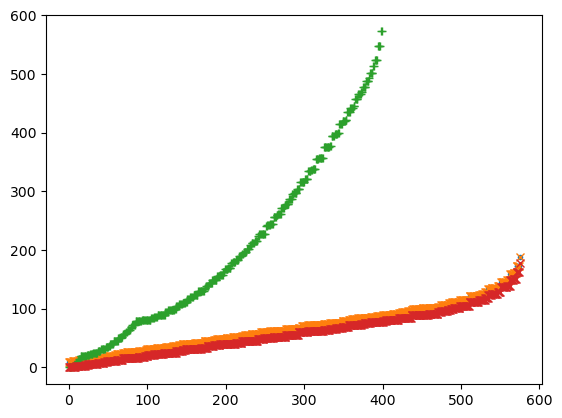

In [322]:
plt.plot( np.sort( np.array( list( itertools.product(E1,E1) )).sum(axis=1) ), '.' )
plt.plot( np.sort(E2Bloch), 'x')
plt.plot( np.sort( (k2[:,0]/2+k2[:,1])**2 + (k2[:,0]/2-k2[:,1])**2 ) , '+' )
plt.plot( np.sort( [ KCM**2/2+2*krel**2 for KCM,krel in kk2 ] ), 'x' )

In [323]:
s1 = Bloch_2states[2]
s2 = Bloch_2states[1]
in1, ik1 = s1[0]
in2, ik2 = s1[1]
Ubands[ik1,:,in1]

array([0.0215741 , 0.71227463, 0.70156925])

In [324]:
%%time 

# diagonal part of the Hamiltonian

# H2B = sp.sparse.diags( np.array( list( itertools.product(E1,E1) )).sum(axis=1) )
#H2B = sp.sparse.diags(E2Bloch)
#H2B = H2B.tolil()

H2B = np.diag(np.array(E2Bloch))

# interaction matrix elements: only non-zero ones

for n44 in np.array( list( itertools.product(nn,nn,-nn,-nn) )):
    ni1, ni2, nip1, nip2 = n44[-4:]
    for ik4L, k4L in enumerate(k4_list):
        #print(ik4L, k4sum_values[ik4L])
        for k4 in k4L:
            ik1, ik2, ik1p, ik2p = k4[-4:]
        
            ind1 = ni1*Nkz+ik1 
            ind2 = ni2*Nkz+ik2
            ind1_2 = ind1*len(Bloch_states)+ind2
            
            indp1 = nip1*Nkz+ikp1 
            indp2 = nip2*Nkz+ikp2
            ind2_2 = indp1*len(Bloch_states)+indp2
    
            V121p2p=0
            for n4 in n4_list[-ik4L-1]:
                g1, g2, g1p, g2p = n4[-4:]
                V121p2p += np.conj(Ubands[ik1,g1,ni1])*np.conj(Ubands[ik2,g2,ni2])*Ubands[ikp1,g1p,nip1]*Ubands[ikp2,g2p,nip2]
                
            H2B[ind1_2, ind2_2] += -g*V121p2p

CPU times: user 2.44 s, sys: 2.1 ms, total: 2.44 s
Wall time: 2.44 s


In [325]:
E2Bs, U2Bs = sp.sparse.linalg.eigsh(H2B,k=20, which='SM')

In [326]:
np.sort(E2Bs)

array([ 9.25634624,  9.85446912,  9.85570324,  9.85584005,  9.85608695,
       10.44669544, 10.45051159, 10.45158842, 10.45247742, 11.62325641,
       11.62719625, 11.62736019, 11.6286212 , 12.21996301, 12.22306783,
       12.22409603, 12.22432916, 12.22636337, 12.22886901, 13.99572497])

In [327]:
#E2B_dense, U2Bdense = np.linalg.eigh(H2B.todense())
E2B_dense, U2Bdense = np.linalg.eigh(H2B)

In [328]:
E2B_dense[:60]

array([ 9.25697473,  9.85218725,  9.85446197,  9.85446368,  9.85446368,
       10.44931854, 10.45142556, 10.45142796, 10.45142796, 11.62444769,
       11.62660357, 11.62660779, 11.62660779, 12.21882293, 12.2235569 ,
       12.22357196, 12.22357206, 12.22357206, 12.22357206, 12.22357206,
       12.22357206, 13.99289383, 13.99569911, 13.99571603, 13.99571617,
       14.44740954, 14.45000758, 14.45002186, 14.45002186, 15.04093628,
       15.04694227, 15.04698542, 15.04698614, 15.04698614, 15.04698614,
       15.04698614, 15.04698614, 16.80813783, 16.81902949, 16.81912756,
       16.81913024, 16.81913024, 16.81913024, 16.81913024, 16.81913024,
       16.92699157, 16.92810468, 17.52188557, 17.52506581, 17.52506895,
       17.52506895, 19.27374289, 19.2972008 , 19.29721306, 19.29721306,
       19.53554567, 19.64241161, 19.64254431, 19.75672379, 21.86098177])

In [329]:
np.sort(E2Bloch)[:20]

array([ 9.25749941,  9.85446368,  9.85446368,  9.85446368,  9.85446368,
       10.45142796, 10.45142796, 10.45142796, 10.45142796, 11.62660779,
       11.62660779, 11.62660779, 11.62660779, 12.22357206, 12.22357206,
       12.22357206, 12.22357206, 12.22357206, 12.22357206, 12.22357206])

In [330]:
E2[:20]

array([ 9.24534502,  9.53491814,  9.55581181, 10.42993788, 10.45067122,
       11.91423306, 11.93505277, 13.97305752, 13.99410222, 16.57144002,
       16.59296276, 19.61343211, 19.63609618, 22.75424934, 22.78018385,
       24.50926752, 29.44353283, 29.45455092, 29.74220967, 29.7521211 ])

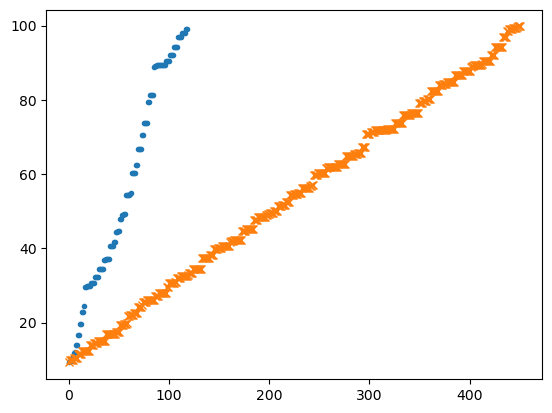

In [346]:
Ecut = 100
plt.plot(E2[E2<Ecut], '.')
plt.plot(E2B_dense[E2B_dense<Ecut], 'x')

In [235]:
%%time
nsum_list = []
ksum_list = []
dK0_count = 0
dG0_count = 0
for i1, s1 in tqdm(enumerate(Bloch_2states)):
    in1, ik1 = s1[0]
    in2, ik2 = s1[1]
    Cnk1 = Ubands[ik1,:,in1]
    Cnk2 = Ubands[ik2,:,in2]
    unk1 = f_unk(xGL,Cnk1,Gnn)
    unk2 = f_unk(xGL,Cnk2,Gnn)
    for i2, s2 in enumerate(Bloch_2states):
        inp1, ikp1 = s2[0]
        inp2, ikp2 = s2[1]
        Cnkp1 = Ubands[ikp1,:,inp1]
        Cnkp2 = Ubands[ikp2,:,inp2]
        unkp1 = f_unk(xGL,Cnkp1,Gnn)
        unkp2 = f_unk(xGL,Cnkp2,Gnn)
        nsum = nn[in1]+nn[in2]-nn[inp1]-nn[inp2]
        nsum_list.append(nsum)
        ksum = kkz[ik1]+kkz[ik2]-kkz[ikp1]-kkz[ikp2]
        ksum_list.append(ksum)
        if np.mod(ksum,2*np.pi) == 0:
            dK0_count += 1 
            integrand = np.conj(unk1*unk2)*unkp1*unkp2*np.exp(1j*ksum*xGL)
            #H2B[i1,i2] += -g*wGL.dot(integrand)
            if nsum == 0:
                dG0_count += 1
                H2B[i1,i2] += -g*Cnk1[

SyntaxError: incomplete input (<unknown>, line 29)

In [ ]:
dK0_count / len(Bloch_2states)**2

In [ ]:
plt.plot(nsum_list,'.')

In [ ]:
plt.plot(ksum_list,'.')

In [ ]:
plt.imshow(np.abs(H2B.todense()))

In [ ]:
E2B, U2B = np.linalg.eigh(H2B.todense())

In [ ]:
E2Bs, U2Bs = sp.sparse.linalg.eigsh(H2B,k=20, which='SR')

In [ ]:
np.sort(E2Bs)

In [ ]:
E2s

In [ ]:
plt.plot(E2B[:100],'.')
plt.plot(E2[:100],'.')
